# Crimes in San Francisco in 2016

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import seaborn

In [3]:
crimes = pd.read_csv("crimes.csv", sep = ",")

In [60]:
crimes.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [16]:
crimes.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object


## Liste des quartiers triés par nombre décroissant de crimes

In [4]:
#liste des quartiers triés par nombre décroissant de crimes
crimes.groupby("PdDistrict").PdId.count().sort_values(ascending = False)

PdDistrict
SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: IncidntNum, dtype: int64

## Types de crimes les plus fréquents dans le quartier Southern

In [24]:
crimes[(crimes.PdDistrict == "SOUTHERN")].groupby("Category").PdId.count().sort_values(ascending = False)[:10]

Category
LARCENY/THEFT     9203
NON-CRIMINAL      3402
OTHER OFFENSES    3336
ASSAULT           2352
VANDALISM         1439
WARRANTS          1367
SUSPICIOUS OCC     962
DRUG/NARCOTIC      923
BURGLARY           842
MISSING PERSON     617
Name: IncidntNum, dtype: int64

## Sanctions appliquées pour le type de crime Assault

In [27]:
crimes[(crimes.Category == "ASSAULT")].groupby("Resolution").PdId.count().sort_values(ascending = False)

Resolution
NONE                                      7936
ARREST, BOOKED                            5416
JUVENILE BOOKED                            134
EXCEPTIONAL CLEARANCE                       48
UNFOUNDED                                   30
ARREST, CITED                                7
CLEARED-CONTACT JUVENILE FOR MORE INFO       4
PSYCHOPATHIC CASE                            1
COMPLAINANT REFUSES TO PROSECUTE             1
Name: IncidntNum, dtype: int64

## Nombre de crimes par jour

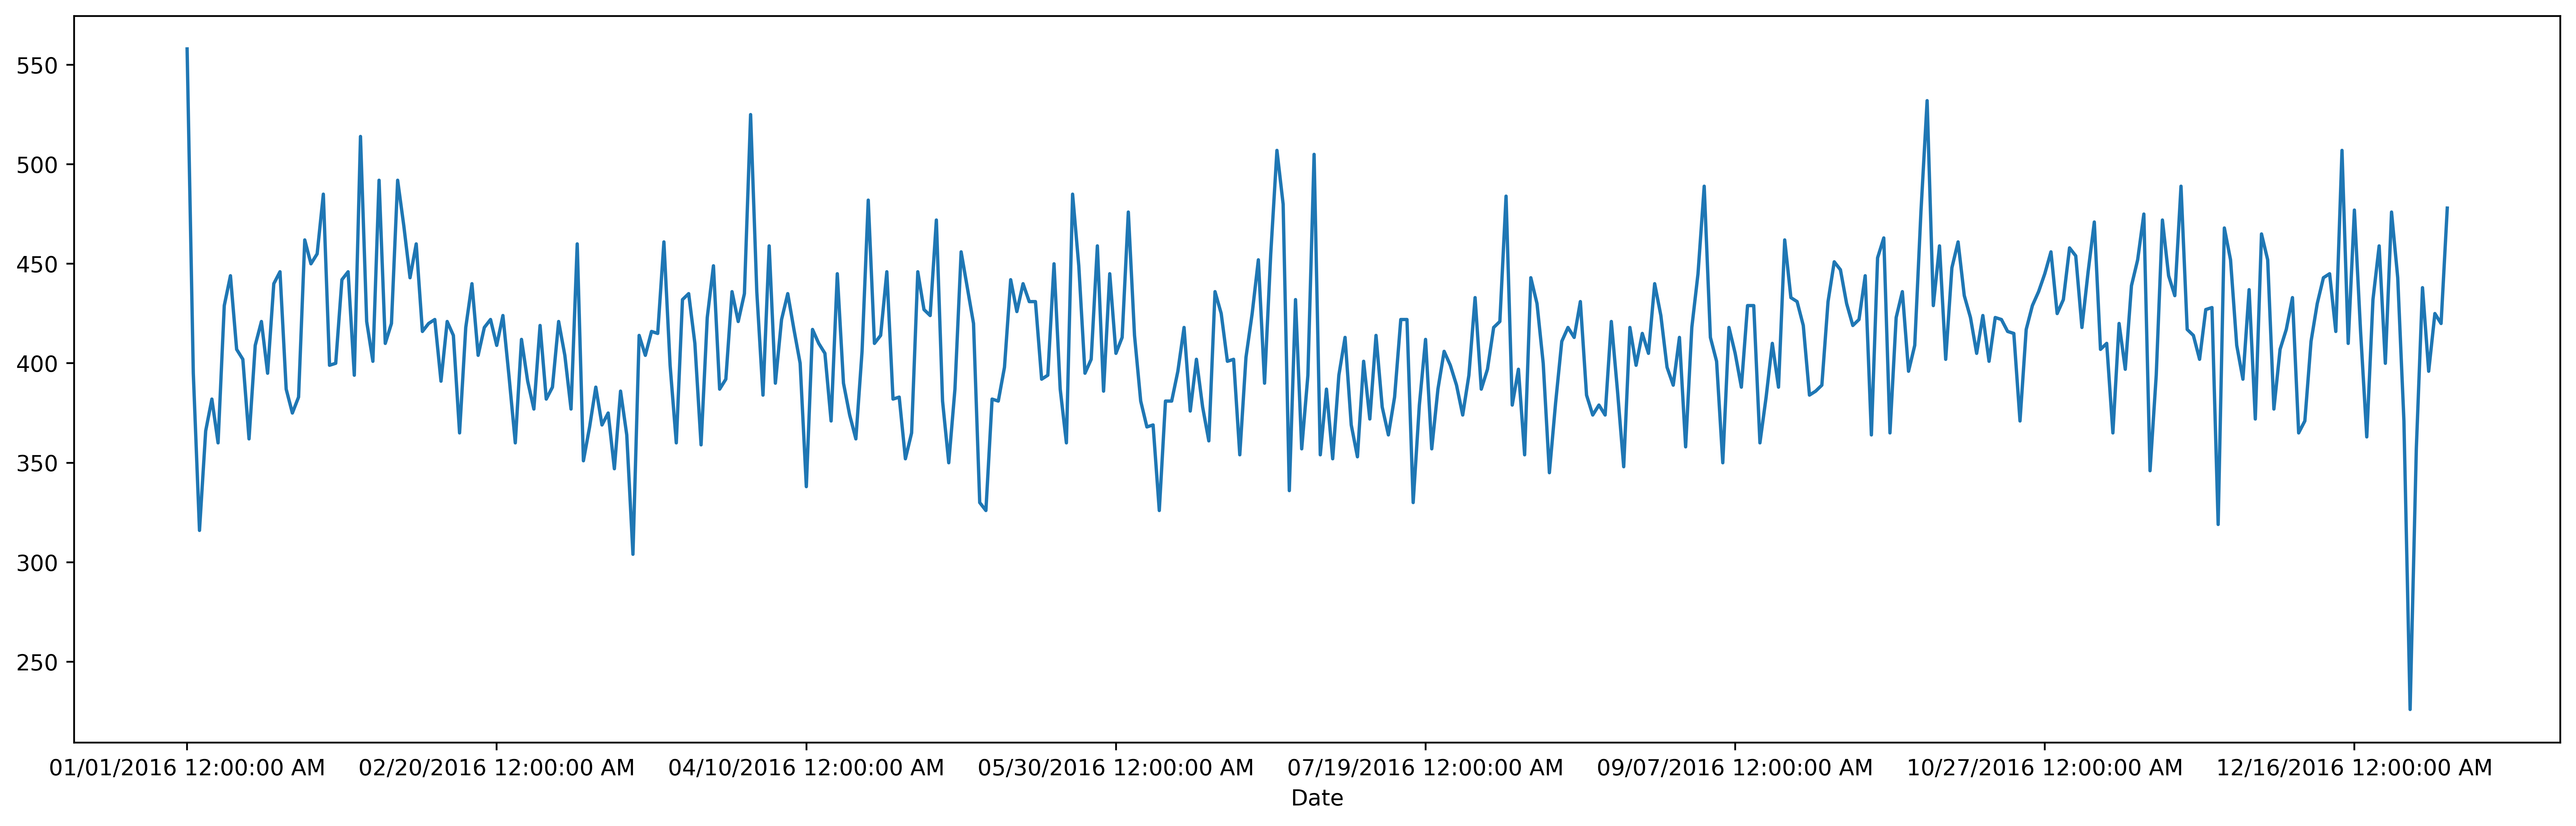

In [46]:
plt.rcParams['figure.figsize'] = [20, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 500 # résolution en points par pouce
crimes.groupby("Date").PdId.count().plot()

## Nombre de crimes non résolus par jour

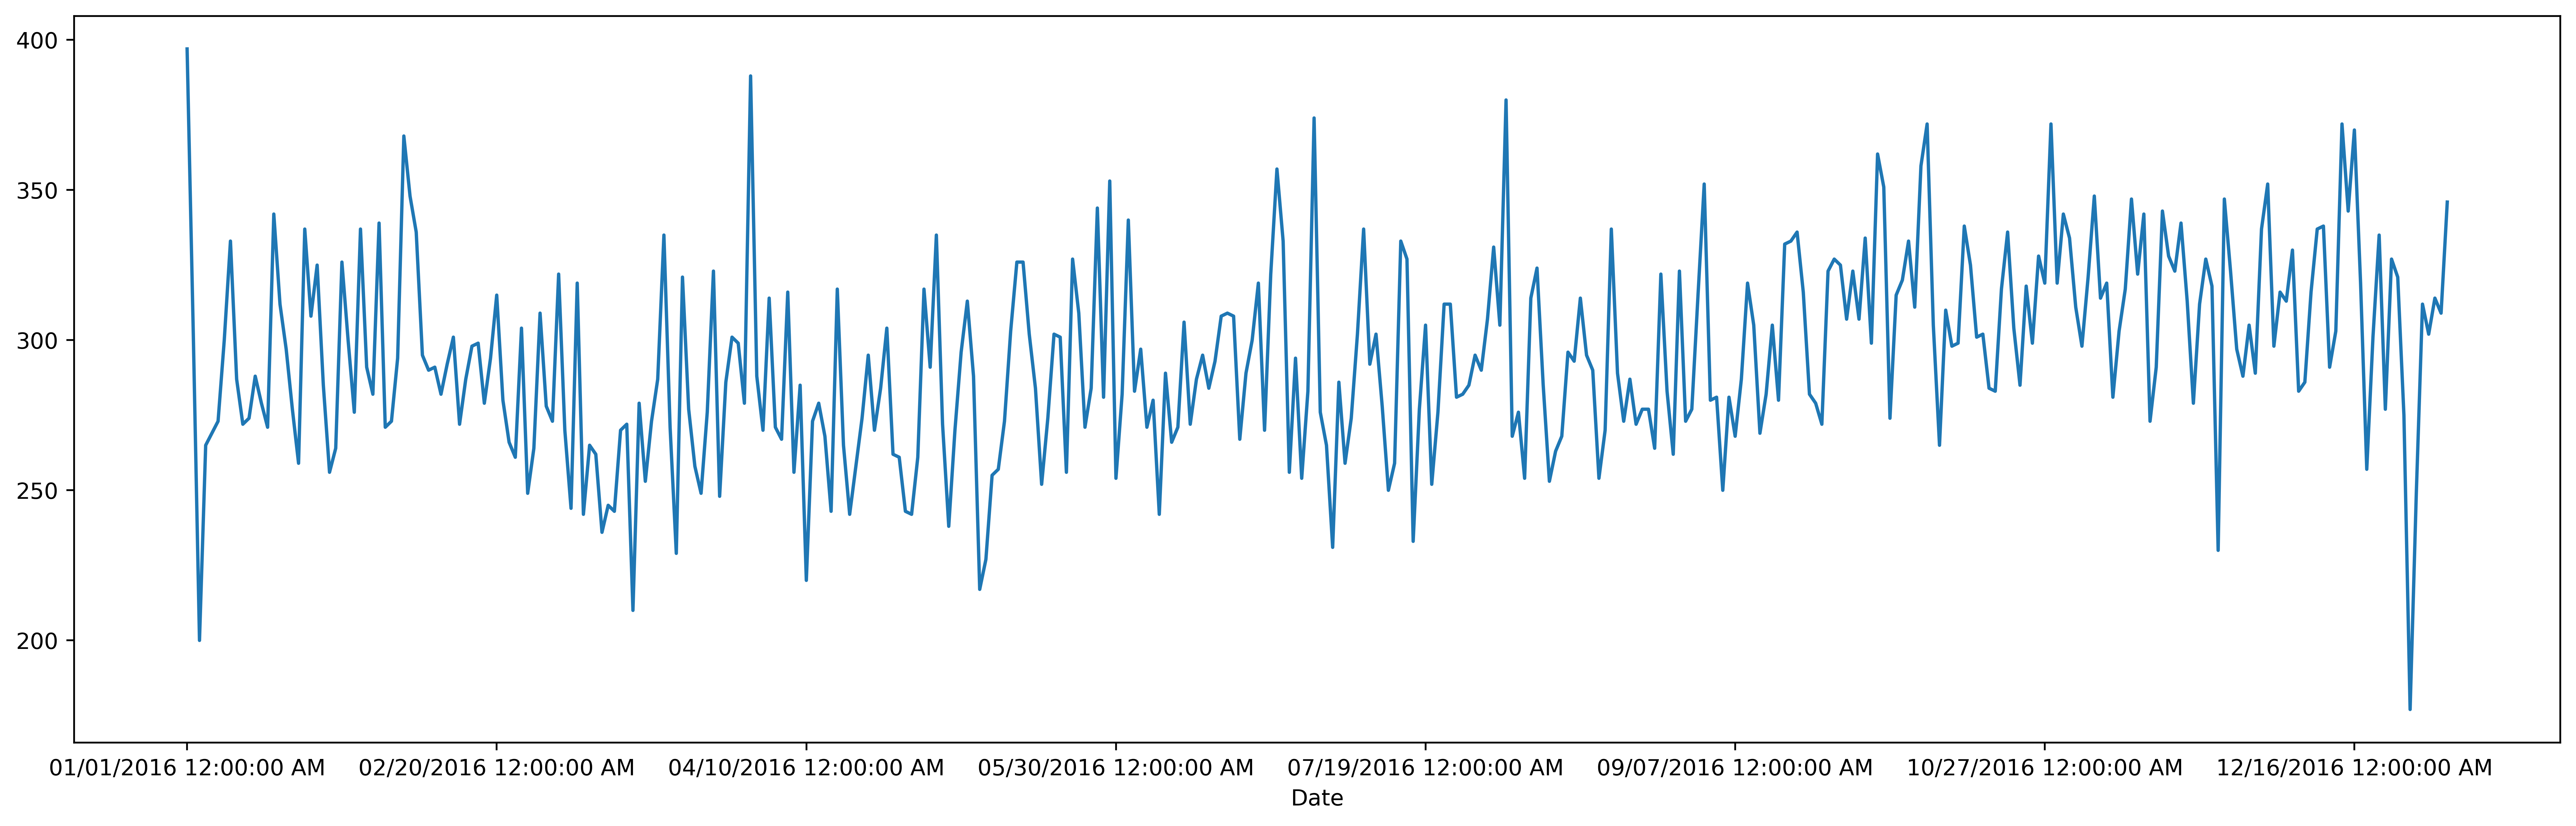

In [52]:
crimes[(crimes.Resolution == "NONE")].groupby("Date").PdId.count().plot()

## Nombre de vols par jour

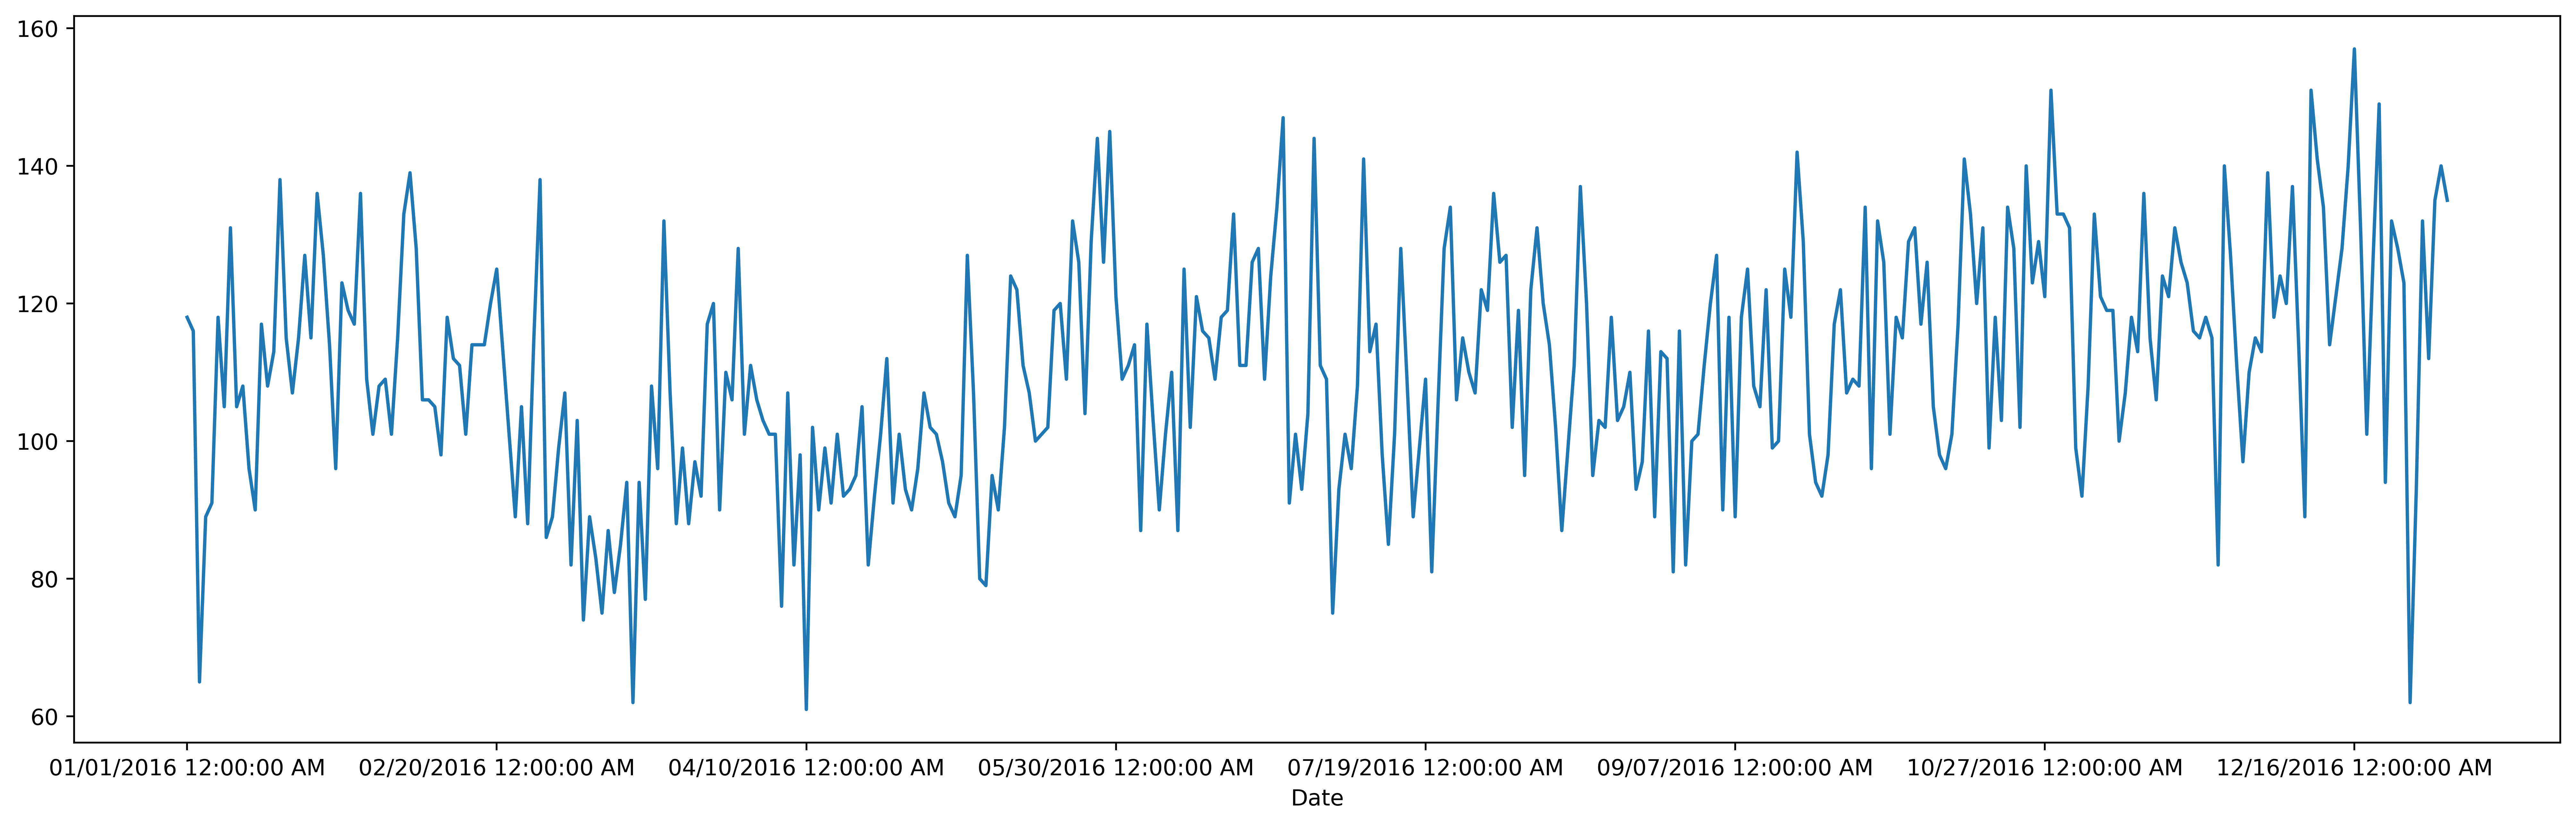

In [61]:
crimes[(crimes.Category == "LARCENY/THEFT")].groupby("Date").PdId.count().plot()